In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

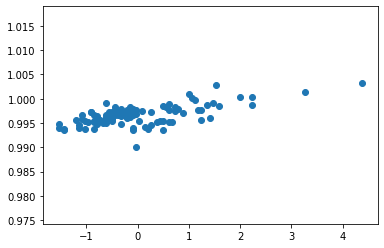

[[[ 1.        ]
  [ 0.60239429]]

 [[ 1.        ]
  [-0.03598116]]

 [[ 1.        ]
  [ 0.60239429]]

 [[ 1.        ]
  [ 0.19615537]]

 [[ 1.        ]
  [-0.67435661]]

 [[ 1.        ]
  [-0.21008356]]

 [[ 1.        ]
  [ 4.37461286]]

 [[ 1.        ]
  [-0.44222008]]

 [[ 1.        ]
  [-0.61632248]]

 [[ 1.        ]
  [-0.50025422]]

 [[ 1.        ]
  [ 1.18273561]]

 [[ 1.        ]
  [ 1.99521345]]

 [[ 1.        ]
  [-0.55828835]]

 [[ 1.        ]
  [ 1.12470147]]

 [[ 1.        ]
  [ 0.48632602]]

 [[ 1.        ]
  [-0.09401529]]

 [[ 1.        ]
  [-1.42880033]]

 [[ 1.        ]
  [-1.0225614 ]]

 [[ 1.        ]
  [-0.79042488]]

 [[ 1.        ]
  [ 1.356838  ]]

 [[ 1.        ]
  [ 0.2541895 ]]

 [[ 1.        ]
  [-0.38418595]]

 [[ 1.        ]
  [-1.0225614 ]]

 [[ 1.        ]
  [-1.54486859]]

 [[ 1.        ]
  [ 0.48632602]]

 [[ 1.        ]
  [ 0.77649668]]

 [[ 1.        ]
  [-0.32615182]]

 [[ 1.        ]
  [ 2.22734998]]

 [[ 1.        ]
  [-0.15204943]]

 [[ 1.        

In [2]:
# load data
x = np.genfromtxt('ass1_data/data/q1/linearX.csv', delimiter=',')
y = np.genfromtxt('ass1_data/data/q1/linearY.csv', delimiter=',')

n = 1
m = np.size(y)

# normalize
x = (x - x.mean()) / x.std()

plt.scatter(x, y)
plt.show()

x = x.reshape((m, n))
x = np.hstack((np.ones((m, 1)), x)) # add intercept

x = x.reshape((m, n+1, 1))

y = y.reshape((m, 1))
print(x)
# print(y)

In [3]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

def cost(theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [11]:
def gradient_descent(learning_rate, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
    prev_cost = cost(theta)
    thetas_and_costs = []
    thetas_and_costs.append((theta, prev_cost))
    
    while True:
#         print(t, theta)
        theta_t = theta.copy()
        
        for j in range(n+1):
            summation = 0
            for i in range(m):
                summation += (y[i] - hypothesis(theta_t, x[i])) * x[i][j]
            theta[j] = theta[j] + (learning_rate * summation)
            
        curr_cost = cost(theta)
        thetas_and_costs.append((theta, curr_cost))
        print(t, theta_t, prev_cost, curr_cost)
            
#         if abs(curr_cost - prev_cost) < epsilon or t > 1000:
        if (abs(theta - theta_t) <= epsilon).all() or t > 10:
            return theta, thetas_and_costs
        prev_cost = curr_cost
        t += 1

In [14]:
theta, thetas_and_costs = gradient_descent(0.025, 1e-8)
print(thetas_and_costs)

0 [[0.]
 [0.]] [[0.4966279]] [[1.11741129]]
1 [[2.49155025]
 [0.00335049]] [[1.11741129]] [[2.51417391]]
2 [[-1.24577512]
 [-0.00167525]] [[2.51417391]] [[5.65688981]]
3 [[4.36021294]
 [0.00586336]] [[5.65688981]] [[12.72800058]]
4 [[-4.04876916]
 [-0.00544455]] [[12.72800058]] [[28.63799982]]
5 [[8.56470398]
 [0.01151731]] [[28.63799982]] [[64.43549811]]
6 [[-10.35550573]
 [ -0.01392547]] [[64.43549811]] [[144.97986925]]
7 [[18.02480884]
 [ 0.0242387 ]] [[144.97986925]] [[326.20470431]]
8 [[-24.54566301]
 [ -0.03300756]] [[326.20470431]] [[733.9605832]]
9 [[39.31004476]
 [ 0.05286183]] [[733.9605832]] [[1651.41131071]]
10 [[-56.4735169 ]
 [ -0.07594226]] [[1651.41131071]] [[3715.6754476]]
11 [[87.2018256 ]
 [ 0.11726388]] [[3715.6754476]] [[8360.26975561]]
[(array([[-128.31118814],
       [  -0.17254533]]), array([[0.4966279]])), (array([[-128.31118814],
       [  -0.17254533]]), array([[1.11741129]])), (array([[-128.31118814],
       [  -0.17254533]]), array([[2.51417391]])), (array(

In [13]:
print(theta)

[[-2.81474953e+11]
 [-3.78510940e+08]]


In [30]:
zero_theta = np.zeros((n+1, 1))
cost(zero_theta)

array([[0.4966279]])

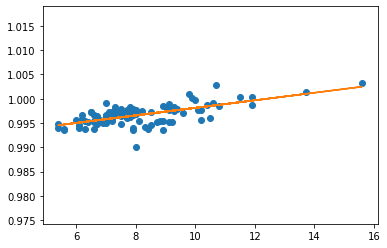

In [35]:
# load data
x_orig = np.genfromtxt('ass1_data/data/q1/linearX.csv', delimiter=',')
y_orig = np.genfromtxt('ass1_data/data/q1/linearY.csv', delimiter=',')

# plt.scatter(x[:, 1, 0], y)
plt.scatter(x_orig, y_orig)
plt.plot(x_orig, [hypothesis(theta, xi)[0] for xi in x], 'C1')
plt.show()

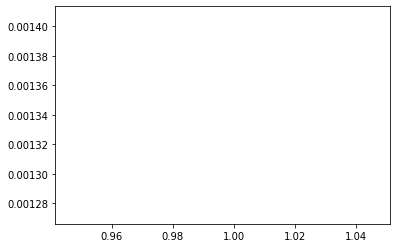

[[0.99635129]
 [0.00133983]]


In [49]:
theta0 = np.linspace(-4, 4, 40)
theta1 = np.linspace(-4, 4, 40)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((40, 40))
# fig = plt.figure()

# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='binary')
# fig, ax = plt.subplots(1, 1)
# ax.contour(X, Y, Z)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
plt.plot(theta[0], theta[1], 'C2')
plt.show()
# temp = np.linspace(0,1,20)
# ax.plot3D(temp, temp, temp, 'red')
print(theta)

# x0 = []
# x1 = []
# for theta, cost in thetas_and_costs:
#     x0.append(theta[0][0])
#     x1.append(theta[1][0])
# #     fig = plt.figure()

# #     # ax = plt.axes(projection='3d')
# #     # ax.contour3D(X, Y, Z, 50, cmap='binary')
# #     fig, ax = plt.subplots(1, 1)
# #     ax.contour(X, Y, Z)
#     # ax.set_xlabel('x')
#     # ax.set_ylabel('y')
#     # ax.set_zlabel('z')
#     plt.plot(x0, x1, markersize=50)
#     plt.draw()
#     plt.pause(0.2)
    

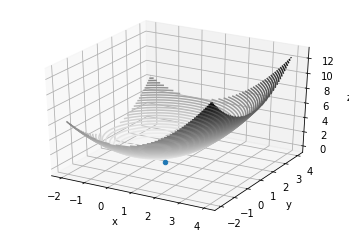

In [72]:
import time

theta0 = np.linspace(-2, 4, 30)
theta1 = np.linspace(-2, 4, 30)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((30, 30))

fig = plt.figure()

ax = plt.axes(projection='3d')

for theta, cost in thetas_and_costs:
#     print(theta, cost)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    temp = np.linspace(0,1,20)
    ax.scatter3D([theta[0]], [theta[1]], cost, 'red')
    plt.show()
    plt.pause(0.2)

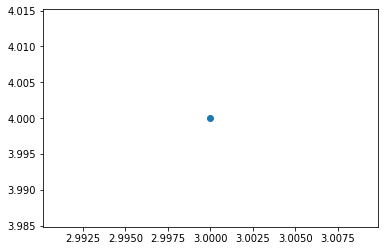

In [51]:
plt.scatter([3], [4])